# Figure 3c

## Total loss monitored during network training for training and validation images

----

Load dependencies:

In [1]:
import tensorflow as tf
import os, glob
import numpy as np
import pandas as pd

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

from matplotlib import pyplot as plt
from IPython import display

Configure GPU and limit memory usage:

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

Load Tensorboard event file:

In [3]:
event_acc = EventAccumulator("data/", size_guidance={'tensors': 0})
event_acc.Reload()

Extract training logs:

In [4]:
logdata = pd.DataFrame(columns=event_acc.Tags()["tensors"])

for tag in event_acc.Tags()["tensors"]:

    data = pd.DataFrame([(s, tf.make_ndarray(t)) for w, s, t in event_acc.Tensors(tag)], columns=['epoch', tag], dtype=float)
    data2 = data.groupby(by="epoch").mean()
    logdata[tag] = data2[tag].ewm(alpha=0.17).mean()


Plot total training and validation loss:

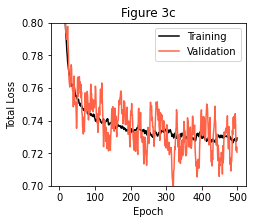

In [5]:
plt.figure(figsize=(3.5, 3.0))

train = logdata.total_loss
val = logdata.val_total_loss

plt.plot(train, label="Training", color="black")
plt.plot(val, label="Validation", color="tomato")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.legend()
plt.ylim((0.7,0.8))
plt.title("Figure 3c")
plt.show()